# Classification Challenge with k-Nearest Neighbors

In [4]:
# import packages
import pandas as pd
import numpy as np 

In [7]:
path = r'C:\Users\aBr\Desktop\New Day\Supervised\Classification\Dataset\telecom_churn_clean.csv'
churn_df = pd.read_csv(path)

In [9]:
churn_df.head(2)

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [10]:
churn_df['churn'].unique()

array([0, 1], dtype=int64)

In [11]:
churn_df.shape

(3333, 20)

In [12]:
churn_df.isna().any().any() # # Check for NaN values in the DataFrame

False

In [17]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

In [18]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# stratify=y in train_test_split, which means the proportion of churned to non-churned customers is maintained in both the training and test sets
# This helps to ensure that the model is trained and tested on datasets that are representative of the full dataset, particularly when dealing with imbalanced classes.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


C:\Users\aBr\anaconda3\envs\supML\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\aBr\anaconda3\envs\supML\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


The model is correctly predicting whether a customer will churn about 85.5% of the time on the unseen test data. This is a relatively high accuracy and suggests that the model is quite effective for this particular classification task.

### Overfitting and underfitting

In [22]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
  	# Set up a KNN Classifier
  	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
  	# Fit the model
  	knn.fit(X_train, y_train)
  
  	# Compute accuracy
  	train_accuracies[neighbor] = knn.score(X_train, y_train)
  	test_accuracies[neighbor] = knn.score(X_test, y_test)

# Create a DataFrame from the accuracy results
results_df = pd.DataFrame({
    'Neighbor': neighbors,
    'Train Accuracy': train_accuracies.values(),
    'Test Accuracy': test_accuracies.values()
})

# Display the DataFrame
print(results_df)

    Neighbor  Train Accuracy  Test Accuracy
0          1        1.000000       0.785607
1          2        0.888597       0.847076
2          3        0.899475       0.832084
3          4        0.875094       0.856072
4          5        0.878470       0.854573
5          6        0.866092       0.859070
6          7        0.870593       0.860570
7          8        0.861590       0.862069
8          9        0.863841       0.863568
9         10        0.858590       0.860570
10        11        0.860465       0.860570
11        12        0.857464       0.860570


The output of your K-Nearest Neighbors (KNN) classifier performance across a range of neighbor values from 1 to 12 provides valuable insights into the behavior of the model:

##### 1. Overfitting with Few Neighbors:
When using just one neighbor (n_neighbors=1), the classifier achieves perfect accuracy on the training data, but this does not generalize well to the test data. This is a classic indication of overfitting, where the model captures the noise in the training set.

##### 2.Generalization Improves as Neighbors Increase:
As the number of neighbors increases, the training accuracy decreases, which is expected because the model becomes simpler and less sensitive to the noise in the training data.
Correspondingly, the test accuracy generally improves as the number of neighbors increases up to a certain point. This shows that the model generalizes better when it considers more neighbors.

##### 3.Optimal Range for Number of Neighbors:
There seems to be a peak in test accuracy around 9 neighbors, after which the accuracy stabilizes or slightly decreases. This could suggest an optimal balance between bias and variance, indicating a good generalization performance on the test set.

##### 4.Stabilization of Test Accuracy:
Beyond a certain point, the test accuracy appears to plateau, suggesting that increasing the number of neighbors further does not significantly improve the model's ability to generalize. It might be that further increasing the number of neighbors would start to introduce too much bias (underfitting).

##### 5.Selection of K Value:
The results suggest that a value of n_neighbors around 8-9 could be a good choice for this dataset since it balances the trade-off between overfitting and underfitting well.

##### 6.Model Complexity and Performance:
The trend indicates that a simpler model (with more neighbors) tends to perform better on the test set than a more complex one (with fewer neighbors). This is aligned with the principle that simpler models tend to generalize better.

##### 7.Consistent Test Accuracy:
It's good to see that the variation in test accuracy is not extreme as the number of neighbors changes. This suggests that the dataset is likely well-behaved, and small changes in the model complexity don't cause huge swings in performance.

### Visualizing model complexity

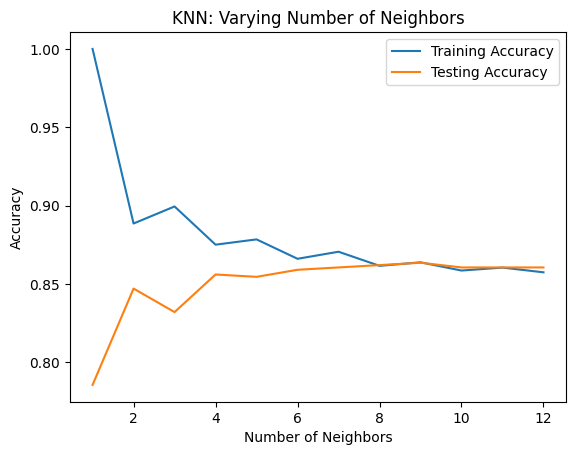

In [24]:
import matplotlib.pyplot as plt
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

The graph suggests an optimal range for the number of neighbors where the testing accuracy is maximized, likely somewhere around 6 to 8 based on this plot.As the number of neighbors increases beyond this point, the model simplifies, potentially leading to underfitting where the model can no longer capture the complexity of the data.

#### Confusion Matrix:
This will give us a more detailed view of where your model is making correct predictions and where it is erring. The counts of true positives, true negatives, false positives, and false negatives will tell not just how many were correct or incorrect, but in what way they were correct or incorrect.

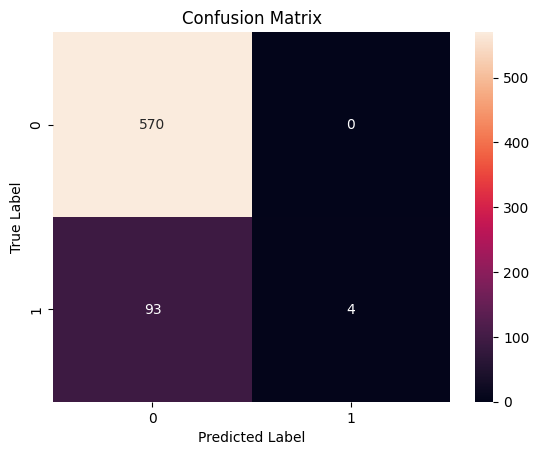

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn for better visualization
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The confusion matrix cm is a 2x2 array (for binary classification) where:

- cm[0, 0] represents the true negatives (TN) — the number of negative instances correctly classified as negative = 570 (e.g., the customer did not churn)
- cm[1, 1] represents the true positives (TP) — the number of positive instances correctly classified as positive = 4 (e.g., the customer churned)
- cm[1, 0] represents the false negatives (FN) — the number of positive instances incorrectly classified as negative = 93 (these were actual positives that the model missed).
- cm[0, 1] represents the false positives (FP) — the number of negative instances incorrectly classified as positive = 4 (no actual negatives were incorrectly labeled by the model)

In sum, while the model is doing well in avoiding false alarms (no churn predicted where there actually wasn't any), it is failing to identify the actual cases of churn effectively. Addressing the imbalance and revisiting the model's decision-making process should be prioritized to improve performance.